In [2]:
# Pandas Web User Guide Follow along

# Visualization
#    https://pandas.pydata.org/docs/user_guide/visualization.html

# Created 11/30/20

# **********************************************
#    Imports 
# **********************************************

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import datetime

# **********************************************
#    Matplotlib & Pandas related settings
# **********************************************

%matplotlib notebook
# %matplotlib inline
# %matplotlib widget --- i think this may only work in labs

# Some matplot lib things to remember
# plt.get_fignums()       <-- get list of active figures
# plt.figure(x);          <-- activate the figure if it exists, create it if it does not
#                         <-- semi colon is recomended so  you don't have multiple visualizations of the same fig
# plt.close('all')        <-- close all open figures
# df.plot(figsize=(4,3))  <-- make a plot from dataframe with desired size
plt.rcParams["figure.figsize"] = (5,3)     # Set default fig size


# **********************************************
#    Interactive mode settings
# **********************************************

# How interactive you want is discussed:
# https://ipython.readthedocs.io/en/stable/config/options/terminal.html
# Options are: 'all', 'last', 'last_expr', 'none', 'last_expr_or_assign'
# Default is: 'last_expr'

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity I can only get last_expr_or_assign to work
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

In [3]:
def diag(*args):
    """Pandas diagnostics"""
    
    for i in args:
        
        if isinstance(i, pd.core.frame.DataFrame):
            print(i.info())
            display(i)
        else:
            print(f'{"-"*40}')
            print(f'Type: {type(i)}')

            try:
                print(f'Length: {len(i)}')
            except:
                pass

            try:
                print(i.info())
            except:
                pass

            try:
                display(i)
            except:
                print(i)
                
z = diag
d = display;

In [4]:
def read_df(text):
    """Create a pandas dataframe from a string of a dataframe
    copied from the pandas website tutorial."""
    lines = text.split('\n')
    cols = lines[0].split()
    index, array = [], []
    for line in lines[1:]:
        vals = line.split()
        index.append(vals[0])
        array.append(vals[1:])
#     print(cols)
#     print(index)
#     print(array)
    df = pd.DataFrame(array, index=index, columns=cols)
    return df

In [5]:
# set a single seed
np.random.seed(seed=123456)

# set a random state and alias the np.random calls
# random_state = np.random.RandomState(seed=123456)
# np.random = random_state

In [6]:
ts = pd.Series(np.random.randn(1000),
   ...:                index=pd.date_range('1/1/2000', periods=1000))

2000-01-01    0.469112
2000-01-02   -0.282863
2000-01-03   -1.509059
2000-01-04   -1.135632
2000-01-05    1.212112
                ...   
2002-09-22   -1.512743
2002-09-23    0.933753
2002-09-24   -0.308013
2002-09-25   -0.079915
2002-09-26   -1.010589
Freq: D, Length: 1000, dtype: float64

In [7]:
ts = ts.cumsum();
ts2 = ts*2;
ts3 = ts*3;
ts4 = ts/2;

<IPython.core.display.Javascript object>


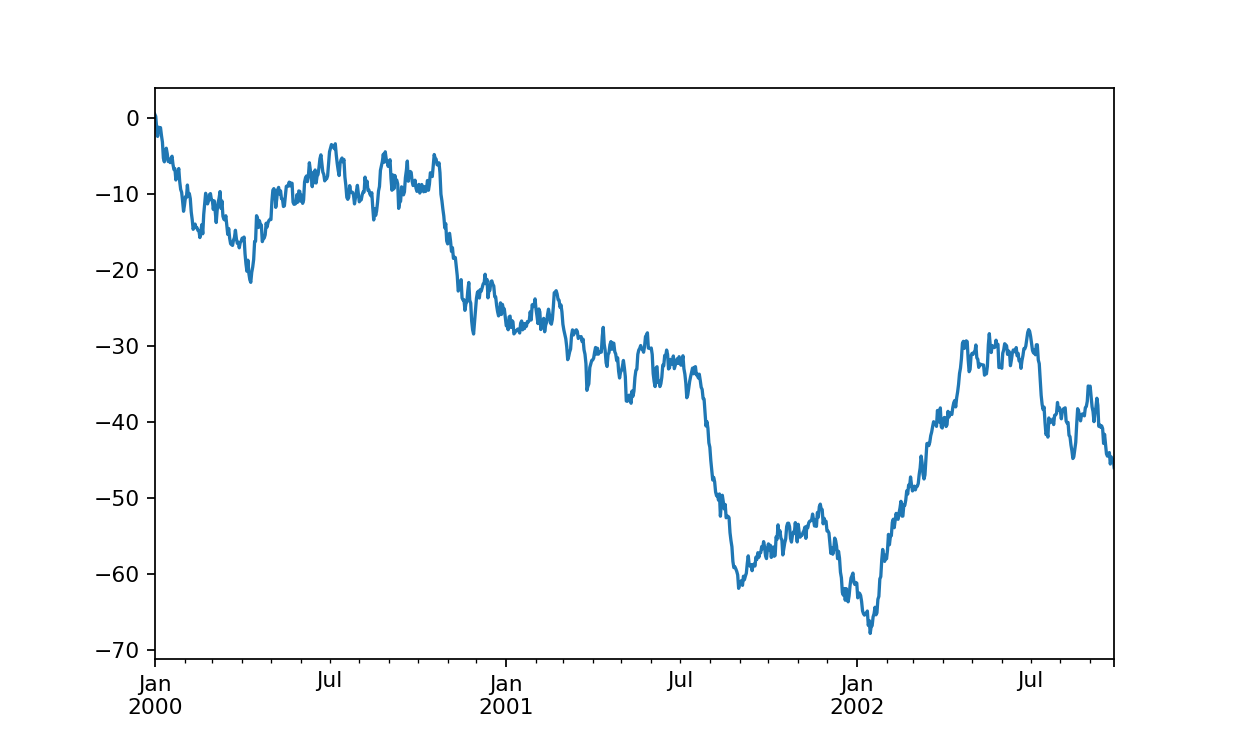

<AxesSubplot:>

In [8]:
# ts.plot(figsize=(6,4))
ts.plot()

<IPython.core.display.Javascript object>


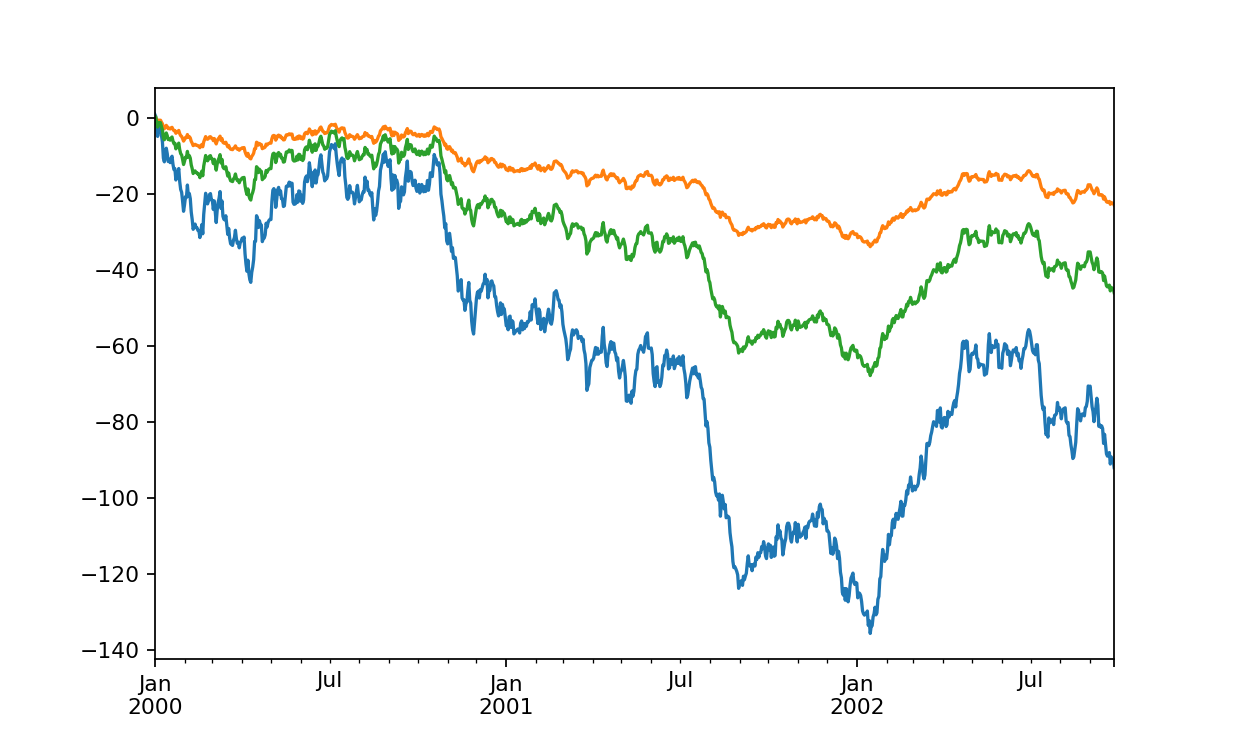

In [9]:
plt.figure(2);

In [10]:
ts2.plot()

<AxesSubplot:>

In [11]:
plt.get_fignums()

[1, 2]

<IPython.core.display.Javascript object>


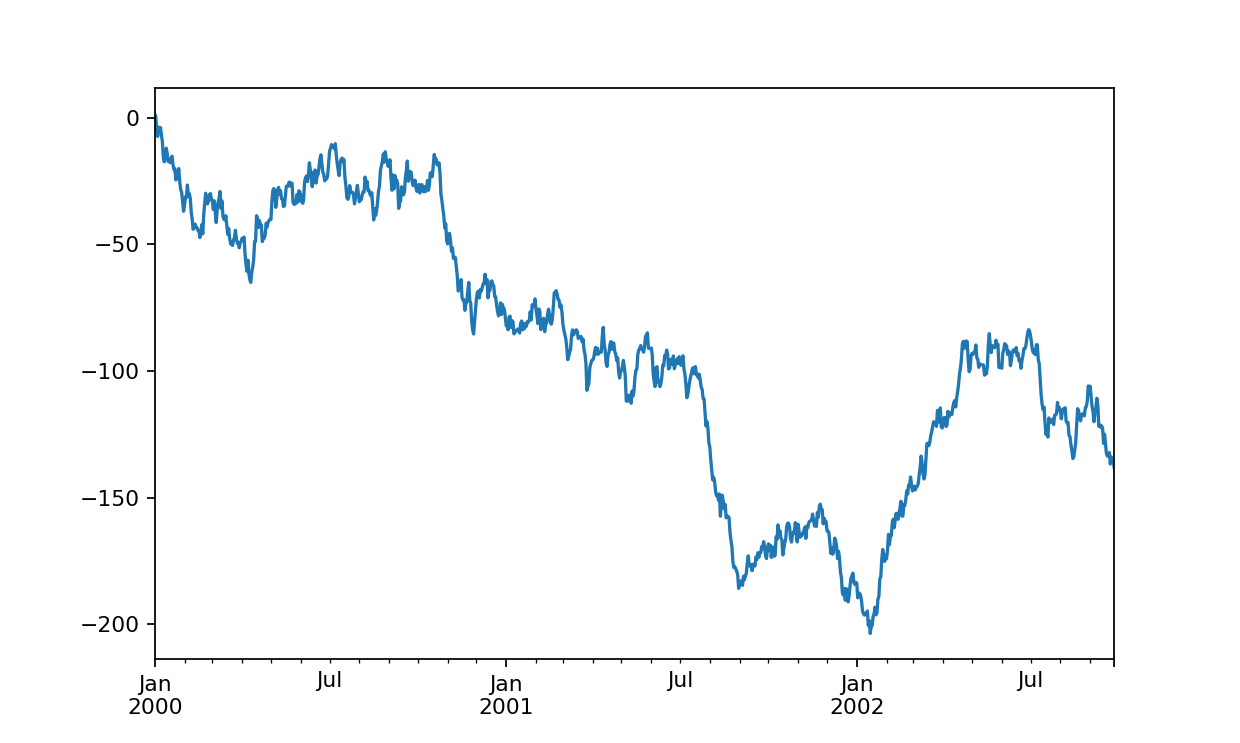

In [12]:
plt.figure(3);

In [13]:
plt.get_fignums()

[1, 2, 3]

In [14]:
ts3.plot()

<AxesSubplot:>

In [15]:
plt.figure(2);

In [16]:
ts4.plot()

<AxesSubplot:>

In [17]:
plt.get_fignums()

[1, 2, 3]

In [18]:
# plt.close('all')

In [19]:
ts.plot()

<AxesSubplot:>

In [20]:
plt.get_fignums()

[1, 2, 3]

In [21]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))

,A,B,C,D
2000-01-01,0.469112,-0.282863,-1.509059,-1.135632
2000-01-02,1.212112,-0.173215,0.119209,-1.044236
2000-01-03,-0.861849,-2.104569,-0.494929,1.071804
2000-01-04,0.721555,-0.706771,-1.039575,0.271860
2000-01-05,-0.424972,0.567020,0.276232,-1.087401
...,...,...,...,...
2002-09-22,0.979256,-1.180839,-0.544735,-0.714758
2002-09-23,-0.701966,-1.233189,1.316605,0.313410
2002-09-24,-0.591876,1.226774,0.227639,1.709756
2002-09-25,-0.061853,1.093207,-0.179307,-1.672583


In [22]:
df = df.cumsum();

<IPython.core.display.Javascript object>


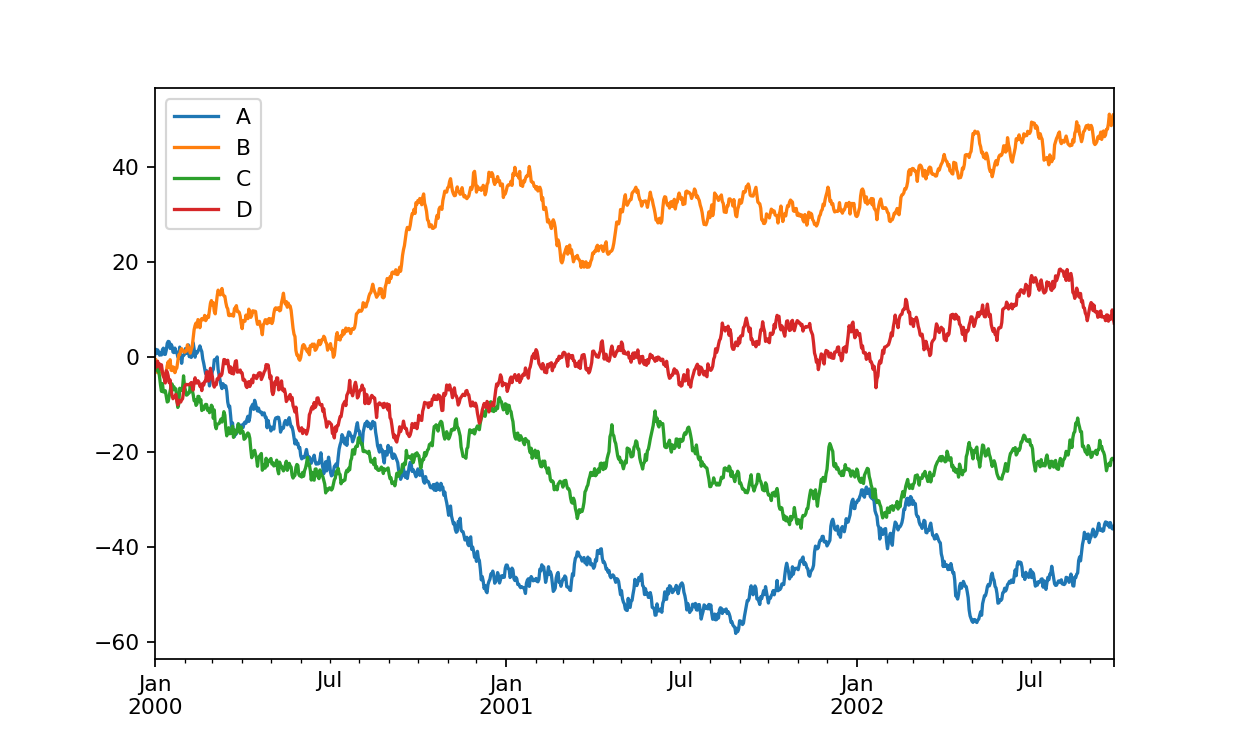

In [23]:
df.plot();

<IPython.core.display.Javascript object>


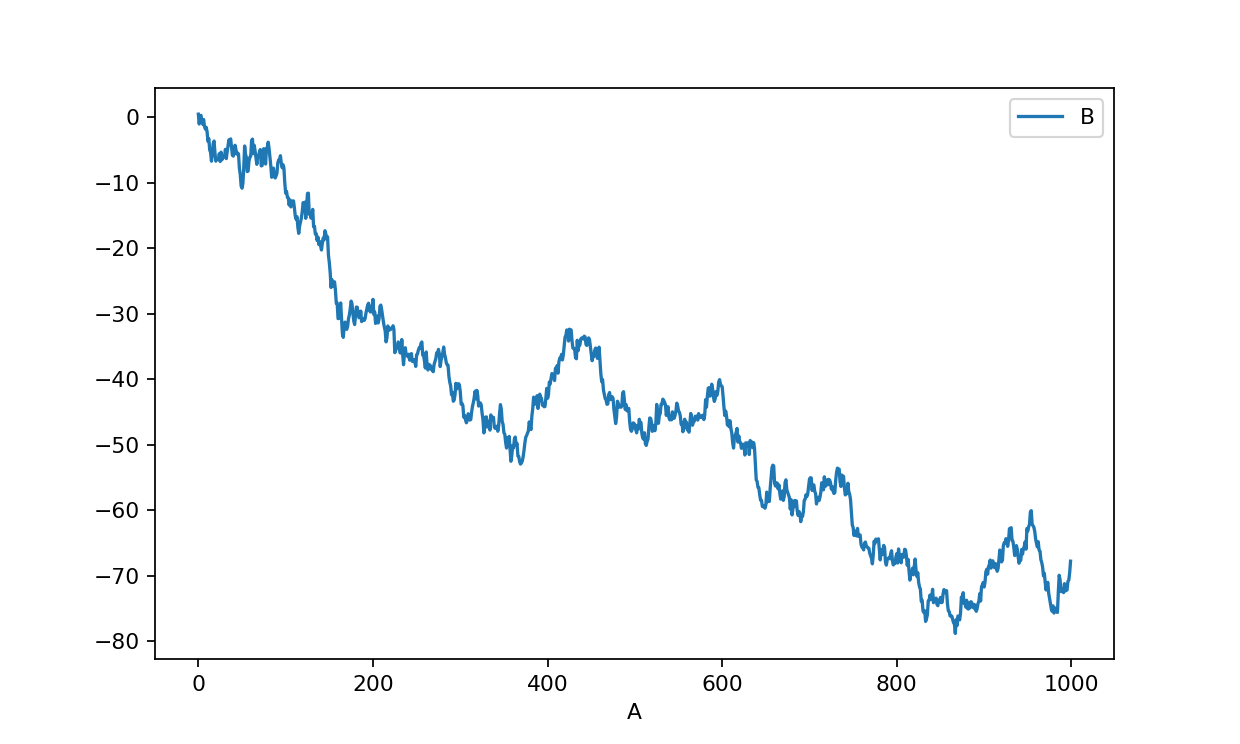

<AxesSubplot:xlabel='A'>

In [24]:
np.random.seed(seed=123456)
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

<IPython.core.display.Javascript object>


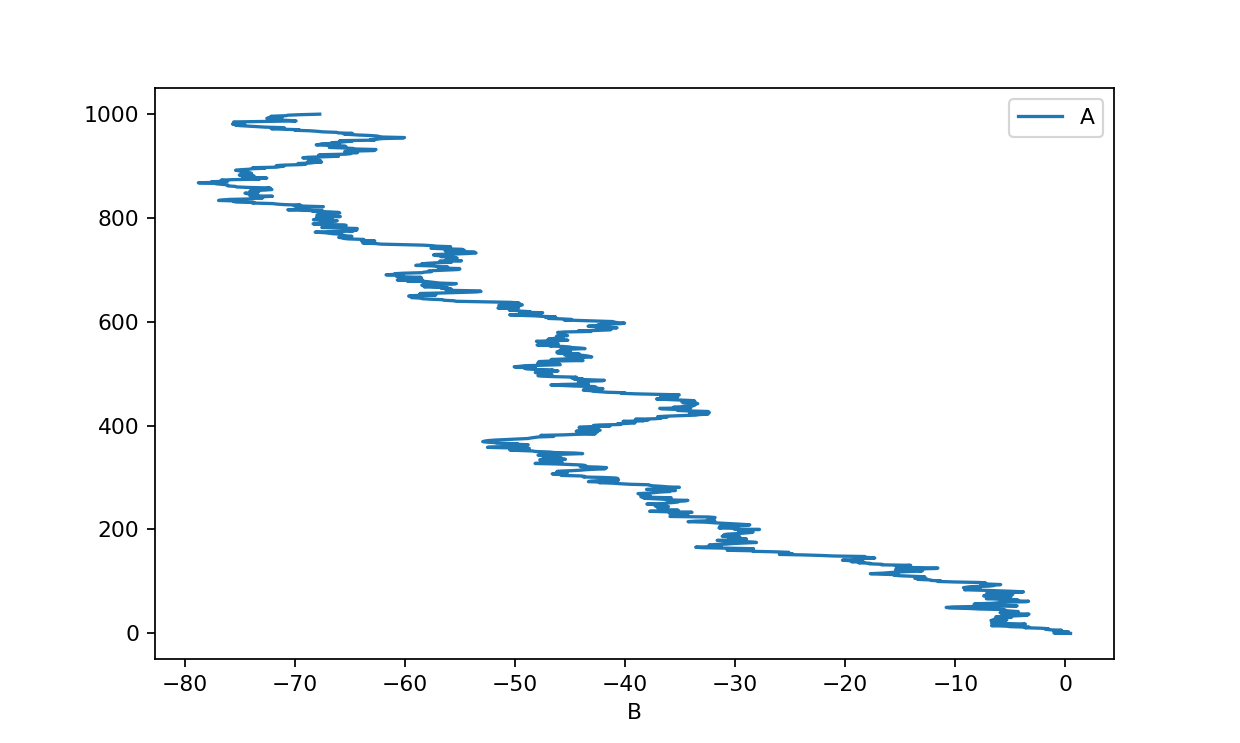

<AxesSubplot:xlabel='B'>

In [25]:
df3.plot(y='A', x='B')

In [26]:
plot_types = ['bar', 'barh', 'hist', 'box', 'kde', 'area', 'scatter', 'hexbin', 'pie']

['bar', 'barh', 'hist', 'box', 'kde', 'area', 'scatter', 'hexbin', 'pie']

<IPython.core.display.Javascript object>


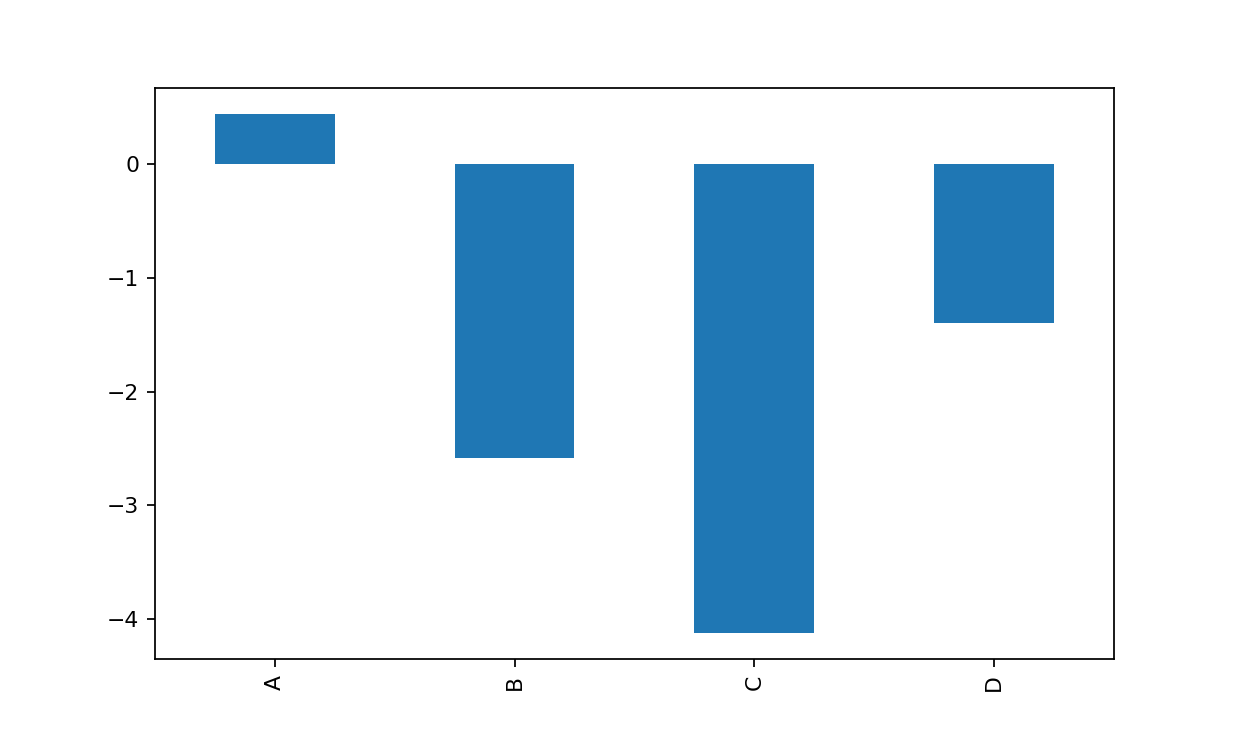

In [27]:
plt.figure();
df.iloc[5].plot(kind='bar');

In [28]:
df.iloc[5]

A    0.442268
B   -2.586750
C   -4.126549
D   -1.398618
Name: 2000-01-06 00:00:00, dtype: float64

<IPython.core.display.Javascript object>


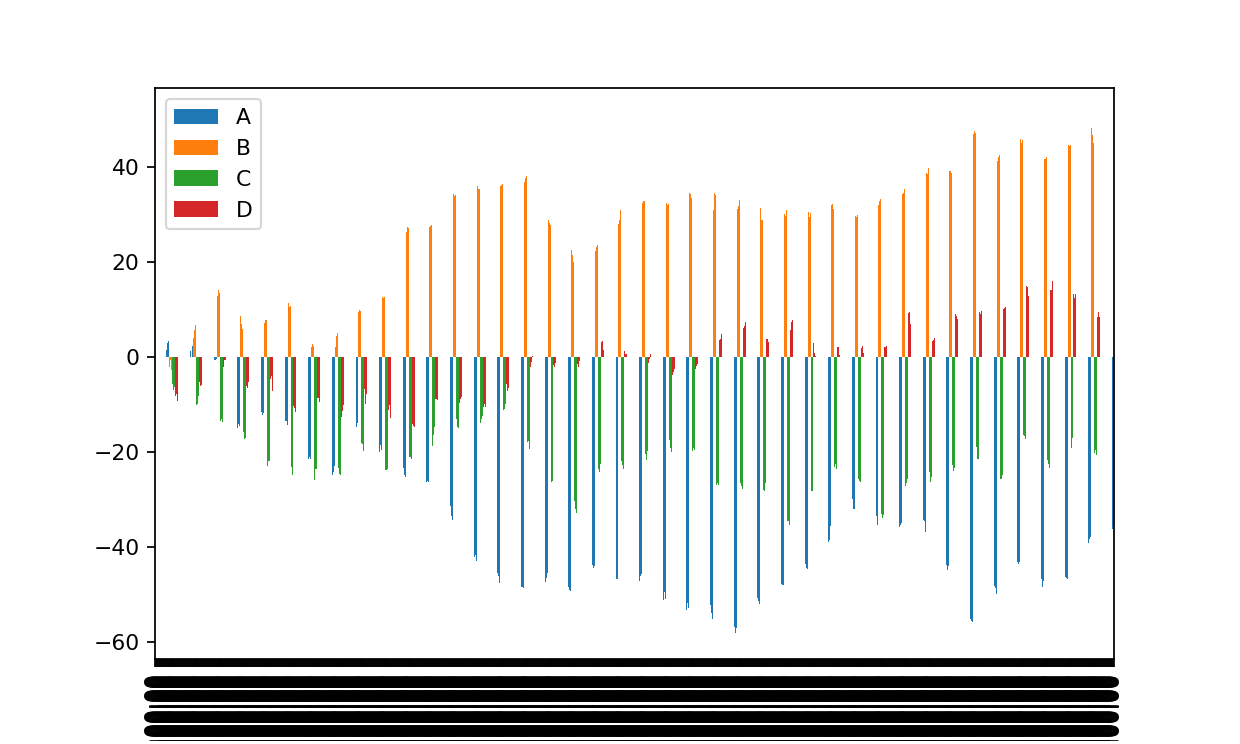

<AxesSubplot:>

In [29]:
df.plot.bar()   # super duper slow to plot!